In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Replace 'data_full.csv' with the actual path to your CSV file if it's not in the current working directory.
df = pd.read_csv('data_full.csv')

# Now 'df' contains your data as a DataFrame.
df.columns

Index(['ID mosta', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Okres', 'Longitude',
       'Latitude', 'Material', 'Názov mosta', 'Dĺžka premostenia',
       'Rok postavenia', 'Volná šírka mosta', 'Normána zaťažiteľnost',
       'Trieda PK', 'Druh konštrukcie', 'Kraj', 'n_2012', 'n_2013', 'n_2014',
       'n_2015', 'n_2016', 'n_2017', 'n_2018', 'n_2019', 'n_2020', 'n_2021',
       'n_2022', 'n_2023'],
      dtype='object')

In [3]:
year_list = [f'n_{i}' for i in range(2012, 2024)]
year_counts = {}

for year in year_list:
    condition_counts = df[year].value_counts()
    non_zero_count = condition_counts[condition_counts.index != 0].sum()
    year_counts[year] = non_zero_count

print(year_counts)


{'n_2012': 7657, 'n_2013': 7650, 'n_2014': 7639, 'n_2015': 7633, 'n_2016': 7660, 'n_2017': 7680, 'n_2018': 7706, 'n_2019': 7779, 'n_2020': 7798, 'n_2021': 7809, 'n_2022': 8080, 'n_2023': 8125}


In [4]:
year_list = [f'n_{i}' for i in range(2012, 2024)]
nested_dict = {}

for year in year_list:
    condition_counts = df[year].value_counts().to_dict()
    
    # Count of classified bridges (non-zero conditions)
    classified_count = condition_counts.get(0, 0)
    
    # Remove the count of classified bridges from the condition_counts dictionary
    del condition_counts[0]
    
    # Store the results in the nested dictionary
    nested_dict[year] = {
        'classified_bridges': len(df) - classified_count,
        'condition_counts': condition_counts
    }
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(nested_dict)


{   'n_2012': {   'classified_bridges': 7657,
                  'condition_counts': {   1: 499,
                                          2: 829,
                                          3: 3445,
                                          4: 2191,
                                          5: 498,
                                          6: 180,
                                          7: 15}},
    'n_2013': {   'classified_bridges': 7650,
                  'condition_counts': {   1: 503,
                                          2: 828,
                                          3: 3421,
                                          4: 2190,
                                          5: 498,
                                          6: 193,
                                          7: 17}},
    'n_2014': {   'classified_bridges': 7639,
                  'condition_counts': {   1: 513,
                                          2: 793,
                                          3: 3335,
     

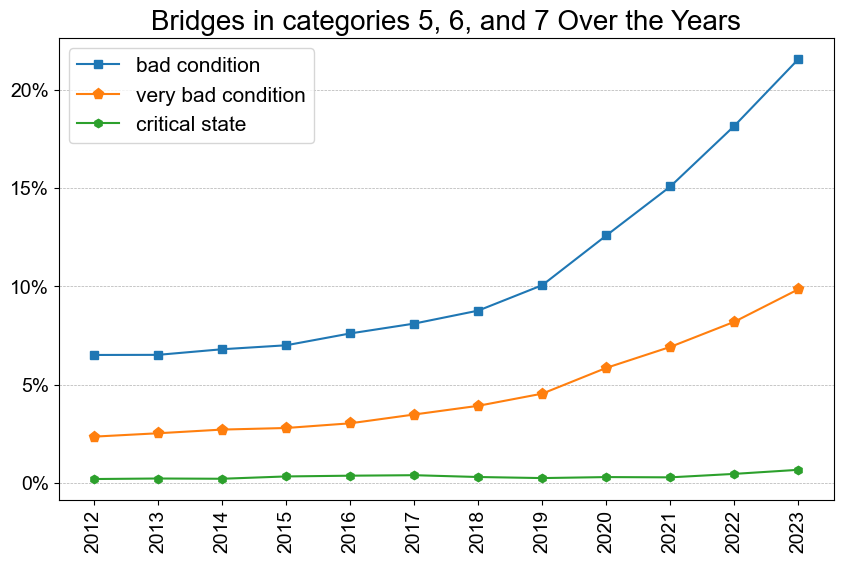

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import matplotlib.ticker as mtick  # Import the ticker module
import matplotlib.font_manager as fm  # Import the font_manager module
import matplotlib as mpl

# Set the default font for Matplotlib
mpl.rcParams['font.family'] = 'Arial'

# Initialize lists to store percentages for each category
category_5_percentages = []
category_6_percentages = []
category_7_percentages = []

# Extract and calculate percentages for each year
for year, data in nested_dict.items():
    total_classified_bridges = data['classified_bridges']
    category_5_count = data['condition_counts'].get(5, 0)
    category_6_count = data['condition_counts'].get(6, 0)
    category_7_count = data['condition_counts'].get(7, 0)
    
    # Calculate percentages and append to the respective lists
    category_5_percent = (category_5_count / total_classified_bridges) * 100
    category_6_percent = (category_6_count / total_classified_bridges) * 100
    category_7_percent = (category_7_count / total_classified_bridges) * 100
    
    category_5_percentages.append(category_5_percent)
    category_6_percentages.append(category_6_percent)
    category_7_percentages.append(category_7_percent)

# List of years for the x-axis
years = [int(year.split('_')[1]) for year in nested_dict.keys()]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, category_5_percentages, label='bad condition', marker='s')
plt.plot(years, category_6_percentages, label='very bad condition', marker='p', markersize=8)
plt.plot(years, category_7_percentages, label='critical state', marker='h')

# plt.plot(years, category_5_percentages, label='zlý stav', marker='s')
# plt.plot(years, category_6_percentages, label='veľmi zlý stav', marker='p', markersize=8)
# plt.plot(years, category_7_percentages, label='havarijný stav', marker='h')


# Increase font size for various text elements
plt.title('Bridges in categories 5, 6, and 7 Over the Years', fontsize=20)  # Adjust the fontsize as needed
# plt.title('Mosty v STS 5, 6, a 7 v priebehu rokov', fontsize=20)  # Adjust the fontsize as needed
plt.xticks(years, fontsize=14, rotation=90)  # Rotate x tick labels by given degrees
plt.yticks(fontsize=14)  # Adjust the fontsize as needed

# Remove vertical gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)  # Remove vertical gridlines

# Use FuncFormatter to format y-axis tick labels as integers
def format_percent(x, pos):
    return f'{int(x)}%'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_percent))

# Move the legend to the bottom of the plot
plt.legend(fontsize=15)  # Adjust the position and number of columns as needed

# Save the plot as an SVG file
plt.savefig('bridges_conditions_en_bold.svg')

# Show plot
plt.show()




In [6]:
df.columns

Index(['ID mosta', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Okres', 'Longitude',
       'Latitude', 'Material', 'Názov mosta', 'Dĺžka premostenia',
       'Rok postavenia', 'Volná šírka mosta', 'Normána zaťažiteľnost',
       'Trieda PK', 'Druh konštrukcie', 'Kraj', 'n_2012', 'n_2013', 'n_2014',
       'n_2015', 'n_2016', 'n_2017', 'n_2018', 'n_2019', 'n_2020', 'n_2021',
       'n_2022', 'n_2023'],
      dtype='object')

In [7]:
df['Material'].value_counts()

Material
monolitický železobetón          3254
prefabrikovaný železobetón       1924
prefabrikovaný predpätý betón    1712
monolitický predpätý betón        394
Nezistený                         316
oceľ -  plnostenná                263
monolitický prostý betón          230
kameň                             193
spriahnutá betón-betón             78
iný materiál                       37
spriahnutá oceľ-betón              30
oceľobetón                         29
tehla                              25
oceľ -  priehradová                17
Name: count, dtype: int64

In [8]:
# List of materials to keep
materials_to_keep = ['monolitický železobetón', 'prefabrikovaný železobetón', 'prefabrikovaný predpätý betón',
                     'monolitický predpätý betón', 'monolitický prostý betón', 'spriahnutá betón-betón',
                     'spriahnutá oceľ-betón', 'oceľobetón']

# Filter the DataFrame to include only the specified materials
filtered_df = df[df['Material'].isin(materials_to_keep)]

filtered_df['Material'].value_counts()


Material
monolitický železobetón          3254
prefabrikovaný železobetón       1924
prefabrikovaný predpätý betón    1712
monolitický predpätý betón        394
monolitický prostý betón          230
spriahnutá betón-betón             78
spriahnutá oceľ-betón              30
oceľobetón                         29
Name: count, dtype: int64

In [9]:
# Define the key-value mapping for "production"
production_mapping = {
    "monolitický železobetón": "cast-in-place",
    "prefabrikovaný železobetón": "precast",
    "prefabrikovaný predpätý betón": "precast",
    "monolitický predpätý betón": "cast-in-place",
    "monolitický prostý betón": "cast-in-place",
    "spriahnutá betón-betón": "cast-in-place",
    "spriahnutá oceľ-betón": "cast-in-place",
    "oceľobetón": "cast-in-place"
}

# Create a custom function to map "Material" to "production"
def map_material_to_production(material):
    return production_mapping.get(material, "other")

# Apply the custom function to create the "production" column
df['production'] = df['Material'].apply(map_material_to_production)

# Print the DataFrame with the new "production" column
print(df[['Material', 'production']])

                           Material     production
0        prefabrikovaný železobetón        precast
1     prefabrikovaný predpätý betón        precast
2     prefabrikovaný predpätý betón        precast
3           monolitický železobetón  cast-in-place
4        monolitický predpätý betón  cast-in-place
...                             ...            ...
8497     monolitický predpätý betón  cast-in-place
8498     monolitický predpätý betón  cast-in-place
8499                   iný materiál          other
8500                   iný materiál          other
8501                   iný materiál          other

[8502 rows x 2 columns]


In [10]:
# Define the key-value mapping for "concrete"
concrete_mapping = {
    "monolitický železobetón": "reinforced",
    "prefabrikovaný železobetón": "reinforced",
    "prefabrikovaný predpätý betón": "prestressed",
    "monolitický predpätý betón": "prestressed",
    "monolitický prostý betón": "reinforced",
    "spriahnutá betón-betón": "reinforced",
    "spriahnutá oceľ-betón": "reinforced",
    "oceľobetón": "reinforced"
}

# Create a custom function to map "Material" to "concrete"
def map_material_to_concrete(material):
    return concrete_mapping.get(material, "other")

# Apply the custom function to create the "concrete" column
df['concrete'] = df['Material'].apply(map_material_to_concrete)

# Print the DataFrame with the new "concrete" column
print(df[['Material', 'concrete']])


                           Material     concrete
0        prefabrikovaný železobetón   reinforced
1     prefabrikovaný predpätý betón  prestressed
2     prefabrikovaný predpätý betón  prestressed
3           monolitický železobetón   reinforced
4        monolitický predpätý betón  prestressed
...                             ...          ...
8497     monolitický predpätý betón  prestressed
8498     monolitický predpätý betón  prestressed
8499                   iný materiál        other
8500                   iný materiál        other
8501                   iný materiál        other

[8502 rows x 2 columns]


In [11]:
df["concrete"].value_counts()

concrete
reinforced     5545
prestressed    2106
other           851
Name: count, dtype: int64

In [12]:
# Drop rows where either 'Dĺžka premostenia' or 'Rok postavenia' is 'Nezistený'
df = df[(df['Dĺžka premostenia'] != 'Nezistený') & (df['Rok postavenia'] != 'Nezistený')]

# Convert values in 'Dĺžka premostenia' to float, errors='coerce' will replace non-numeric values with NaN
df['Dĺžka premostenia'] = pd.to_numeric(df['Dĺžka premostenia'], errors='coerce')

# Convert values in 'Rok postavenia' to float, errors='coerce' will replace non-numeric values with NaN
df['Rok postavenia'] = pd.to_numeric(df['Rok postavenia'], errors='coerce')


# Reset the index of the DataFrame if needed
df.reset_index(drop=True, inplace=True)

In [13]:
df['Rok postavenia'] 

0       1966.0
1       1962.0
2       1967.0
3       1962.0
4       1980.0
         ...  
8254    2022.0
8255    2022.0
8256    2022.0
8257    2022.0
8258    2022.0
Name: Rok postavenia, Length: 8259, dtype: float64

C:\Users\Doktor\AppData\Local\Temp\ipykernel_19432\3838692982.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)


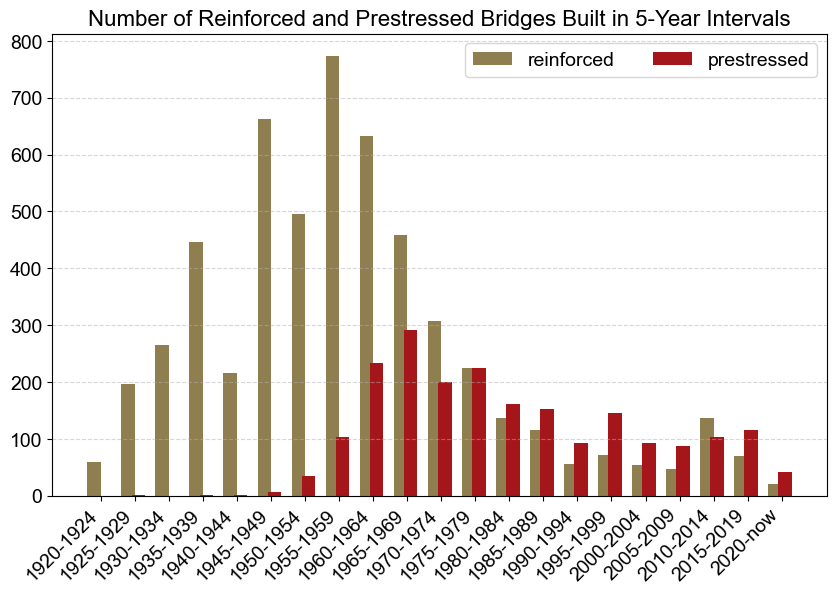

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the bin edges (years) and labels for the 6-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_reinforced = ax.bar(x - bar_width/2, bridge_counts['reinforced'], width=bar_width, label='reinforced', color='#8F7E4F')
bar_prestressed = ax.bar(x + bar_width/4, bridge_counts['prestressed'], width=bar_width, label='prestressed', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Number of Reinforced and Prestressed Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14, ncols=2)

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


C:\Users\Doktor\AppData\Local\Temp\ipykernel_19432\436616209.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


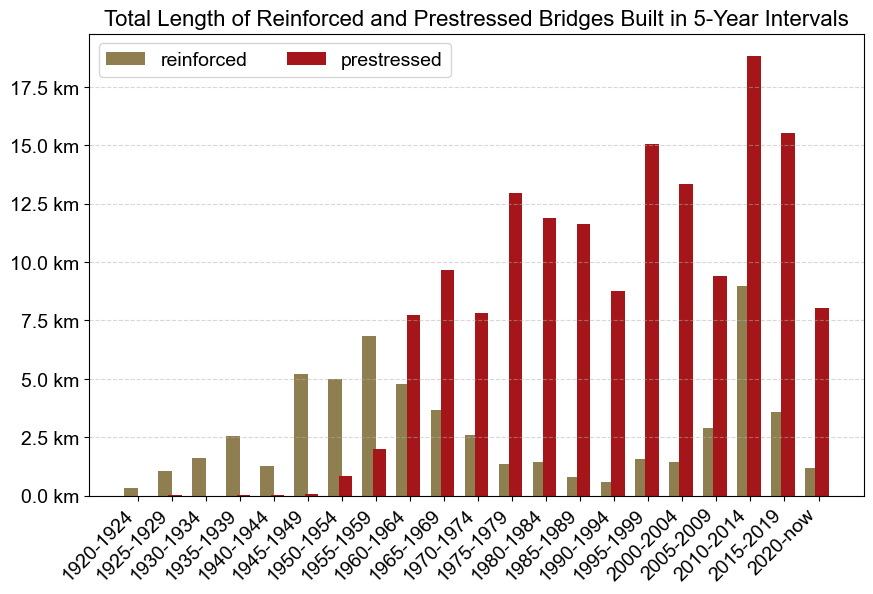

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick


# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1]+bin_value)

bin_labels = [f'{start}-{start+(bin_value-1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot for total bridge length
fig, ax = plt.subplots(figsize=(10, 6))

bar_reinforced = ax.bar(x - bar_width/2, bridge_lengths['reinforced'], width=bar_width, label='reinforced', color='#8F7E4F')
bar_prestressed = ax.bar(x + bar_width/4, bridge_lengths['prestressed'], width=bar_width, label='prestressed', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Total Length of Reinforced and Prestressed Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)

# Set the custom y-axis tick formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

ax.legend(fontsize=14, ncols=2)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


C:\Users\Doktor\AppData\Local\Temp\ipykernel_19432\3883975850.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)


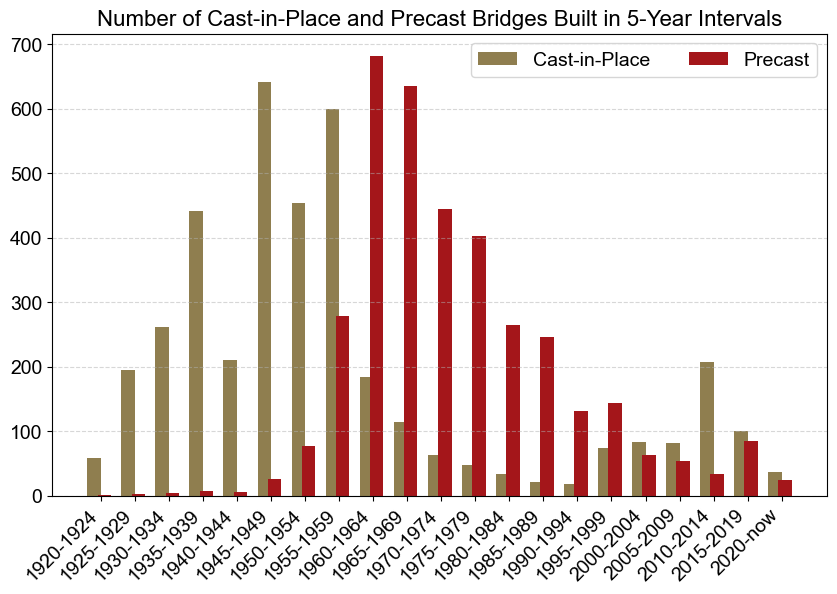

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "cast-in-place" and "precast" rows in the 'production' column
filtered_df = df[df['production'].isin(['cast-in-place', 'precast'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_cast_in_place = ax.bar(x - bar_width/2, bridge_counts['cast-in-place'], width=bar_width, label='Cast-in-Place', color='#8F7E4F')
bar_precast = ax.bar(x + bar_width/4, bridge_counts['precast'], width=bar_width, label='Precast', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Number of Cast-in-Place and Precast Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14, ncols=2)

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


C:\Users\Doktor\AppData\Local\Temp\ipykernel_19432\1038004620.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


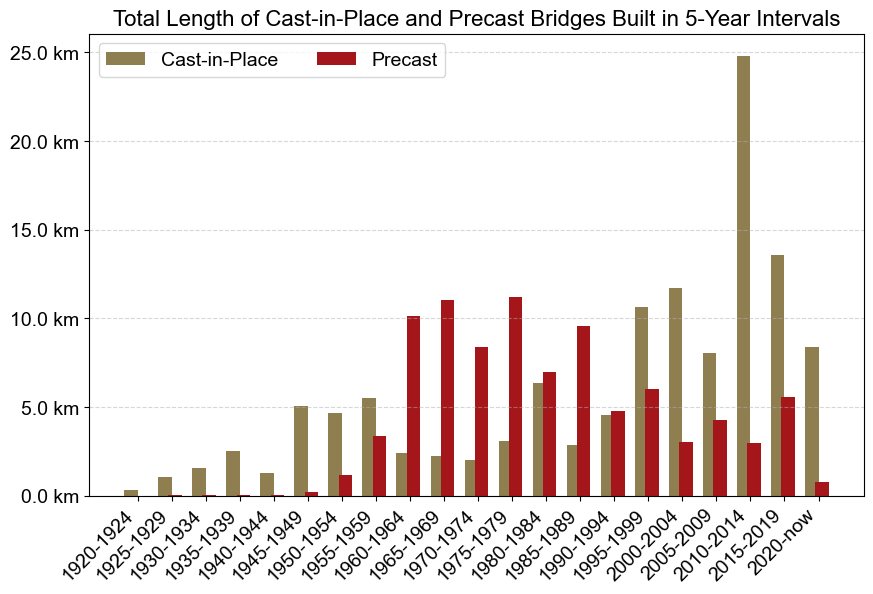

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick


# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1]+bin_value)

bin_labels = [f'{start}-{start+(bin_value-1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "cast-in-place" and "precast" rows in the 'production' column
filtered_df = df[df['production'].isin(['cast-in-place', 'precast'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot for total bridge length
fig, ax = plt.subplots(figsize=(10, 6))

bar_cast_in_place = ax.bar(x - bar_width/2, bridge_lengths['cast-in-place'], width=bar_width, label='Cast-in-Place', color='#8F7E4F')
bar_precast = ax.bar(x + bar_width/4, bridge_lengths['precast'], width=bar_width, label='Precast', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Total Length of Cast-in-Place and Precast Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)

# Set the custom y-axis tick formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

ax.legend(fontsize=14, ncols=2)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


## Nove

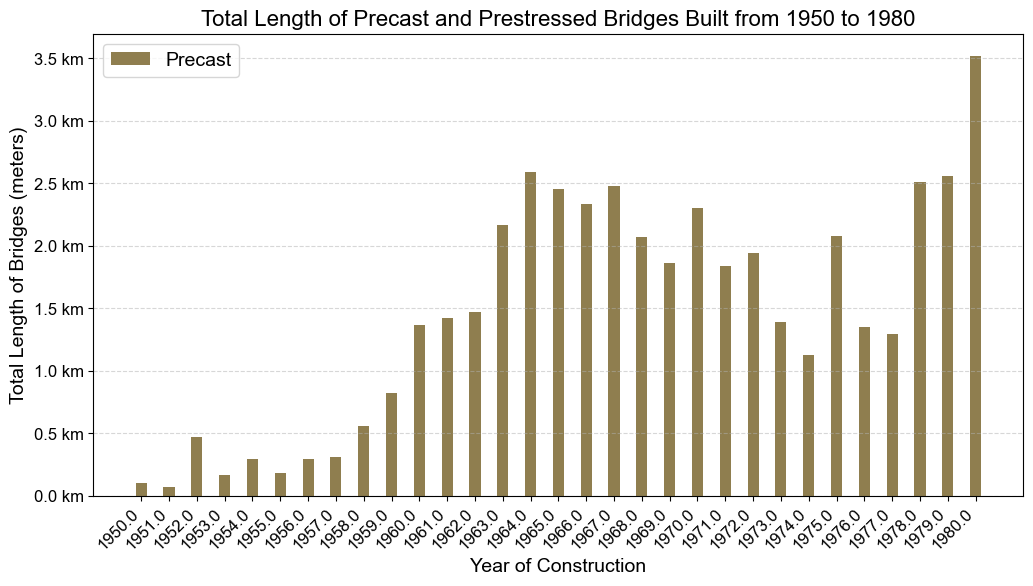

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Filter the DataFrame to include only rows with construction years from 1950 to 1980
filtered_df = df[(df['Rok postavenia'] >= 1950) & (df['Rok postavenia'] <= 1980)]

# Filter the filtered DataFrame further to include only rows with 'precast' and 'prestressed' bridges
filtered_df = filtered_df[filtered_df['production'].isin(['precast', 'prestressed'])]

# Group the filtered DataFrame by 'Rok postavenia' and 'production' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Rok postavenia', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Define the years and categories for the plot
years = bridge_lengths.index
categories = ['precast', 'prestressed']

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(years))

# Create a clustered bar plot for total bridge length
fig, ax = plt.subplots(figsize=(12, 6))

if 'prestressed' in bridge_lengths.columns:
    bar_combined = ax.bar(x, bridge_lengths['precast'] + bridge_lengths['prestressed'], width=bar_width, label='Combined', color='#8F7E4F')
else:
    bar_combined = ax.bar(x, bridge_lengths['precast'], width=bar_width, label='Precast', color='#8F7E4F')

# Add labels and a legend
ax.set_xlabel('Year of Construction', fontsize=14)
ax.set_ylabel('Total Length of Bridges (meters)', fontsize=14)
ax.set_title('Total Length of Precast and Prestressed Bridges Built from 1950 to 1980', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45, ha="right", fontsize=12)
ax.legend(fontsize=14, loc='upper left')

# Set the custom y-axis tick formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=12)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [50]:
# Filter the DataFrame to include only rows with construction years from 1950 to 1980
filtered_df = df[(df['Rok postavenia'] >= 1950) & (df['Rok postavenia'] <= 1980)]

# Filter the filtered DataFrame further to include only rows with 'precast' and 'prestressed' bridges
filtered_df = filtered_df[filtered_df['production'].isin(['precast', 'prestressed'])]

# Calculate the total number of bridges and their total length
total_number_of_bridges = len(filtered_df)
total_length_of_bridges = filtered_df['Dĺžka premostenia'].sum()

print(f'Total number of bridges: {total_number_of_bridges}')
print(f'Total length of bridges (in kilometers): {total_length_of_bridges / 1000:.2f} km')


Total number of bridges: 2529
Total length of bridges (in meters): 45397.283
Total length of bridges (in kilometers): 45.40 km


In [53]:
# Filter the DataFrame to include only rows with construction years from 1950 to 1980
filtered_df = df[(df['Rok postavenia'] >= 1950) & (df['Rok postavenia'] <= 1980)]

# Filter the filtered DataFrame further to include only rows with 'precast' and 'prestressed' bridges
filtered_df = filtered_df[filtered_df['production'].isin(['precast', 'prestressed'])]

# Filter the DataFrame to include only rows with a condition score of 5 or more in the "n_2023" column
condition_df = filtered_df[filtered_df['n_2023'] >= 5]

# Calculate the total number of bridges and their total length
total_number_of_bridges = len(condition_df)
total_length_of_bridges = condition_df['Dĺžka premostenia'].sum()

print(f'Total number of bridges with condition score >= 5: {total_number_of_bridges}')
print(f'Total length of bridges with condition score >= 5 (in meters): {total_length_of_bridges}')
print(f'Total length of bridges with condition score >= 5 (in kilometers): {total_length_of_bridges / 1000:.2f} km')


Total number of bridges with condition score >= 5: 1083
Total length of bridges with condition score >= 5 (in meters): 19756.180999999997
Total length of bridges with condition score >= 5 (in kilometers): 19.76 km
